In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
dataset.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Class           0
dtype: int64

In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train

array([[-0.13213893,  1.66696366, -1.11446869, -1.13658122],
       [-0.37989942, -1.55941762,  0.06555698, -0.10136493],
       [ 2.34546598, -1.09850601,  1.80749963,  1.45145951],
       [-0.8754204 , -1.32896181, -0.38397661, -0.10136493],
       [ 1.35442402,  0.28422883,  1.13319925,  1.45145951],
       [-1.24706114, -0.17668278, -1.28304378, -1.39538529],
       [ 0.11562156, -0.17668278,  0.29032378,  0.41624322],
       [-1.12318089, -0.17668278, -1.28304378, -1.26598326],
       [-0.25601917, -1.32896181,  0.12174868, -0.10136493],
       [-0.99930065,  0.97559624, -1.17066038, -0.74837511],
       [ 1.10666352, -0.17668278,  0.85224076,  1.45145951],
       [-0.13213893, -0.6375944 ,  0.45889887,  0.15743914],
       [ 0.73502279, -0.40713859,  0.34651547,  0.15743914],
       [ 0.61114254, -0.40713859,  1.07700755,  0.80444933],
       [-1.49482163,  0.28422883, -1.28304378, -1.26598326],
       [-0.37989942, -1.55941762,  0.00936528, -0.23076696],
       [ 0.23950181, -0.

In [20]:
X_test

array([[-0.8754204 ,  0.51468463, -1.11446869, -0.87777715],
       [-0.37989942, -1.09850601,  0.40270717,  0.02803711],
       [ 0.23950181, -0.8680502 ,  0.79604906,  0.54564525],
       [-0.00825868, -0.8680502 ,  0.79604906,  0.93385136],
       [ 0.23950181, -2.02032923,  0.73985736,  0.41624322],
       [ 1.35442402,  0.05377302,  0.96462416,  1.19265543],
       [-0.00825868, -0.8680502 ,  0.12174868,  0.02803711],
       [ 1.35442402,  0.05377302,  0.68366566,  0.41624322],
       [ 2.59322647,  1.66696366,  1.52654114,  1.0632534 ],
       [-0.99930065, -2.48124084, -0.10301811, -0.23076696],
       [ 0.73502279, -0.8680502 ,  0.90843246,  0.93385136],
       [-0.50377966, -0.17668278,  0.45889887,  0.41624322],
       [ 0.73502279, -0.6375944 ,  1.07700755,  1.32205747],
       [ 1.10666352,  0.51468463,  1.13319925,  1.71026358],
       [-1.24706114,  0.05377302, -1.17066038, -1.26598326],
       [-1.24706114,  0.74514044, -1.17066038, -1.26598326],
       [-0.99930065,  0.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
y_pred = classifier.predict(X_test)

y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa'], dtype=object)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print()
print("*****************************************************************")
print()
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 11  1]
 [ 0  1  9]]

*****************************************************************

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



In [24]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

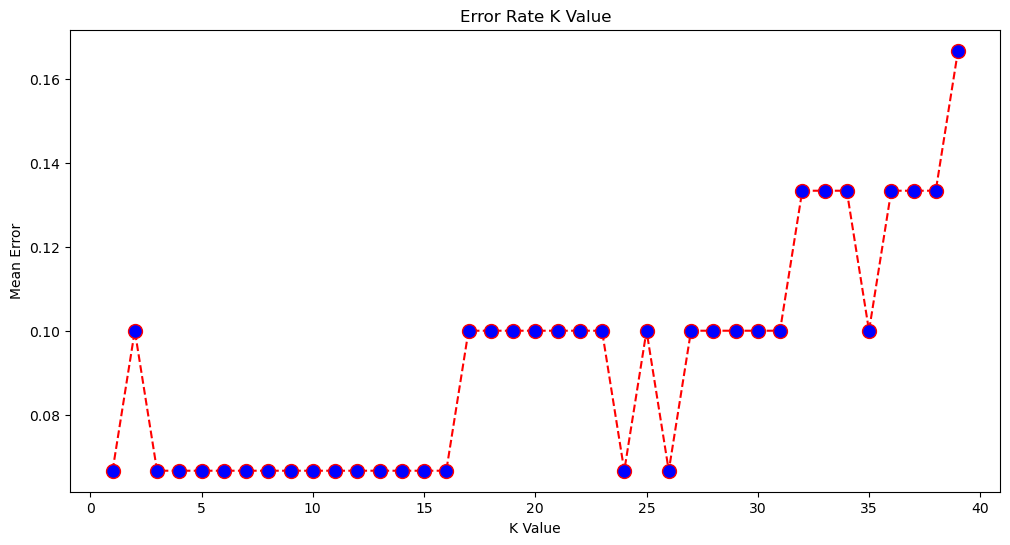

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')